In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

In [31]:
#define cramers v measure
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
def cramers_v_row(c,m):
    return(np.asarray(m.apply(lambda x: cramers_v(x, c))))

In [2]:
df = pd.read_csv("data/public_cars.csv")
df.head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,...,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,...,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,True,160,1600.0


In [51]:
df.isnull().any()

manufacturer_name    False
model_name           False
transmission         False
color                False
odometer_value       False
year_produced        False
engine_fuel          False
engine_has_gas       False
engine_type          False
engine_capacity       True
body_type            False
has_warranty         False
state                False
drivetrain           False
feature_0            False
feature_1            False
feature_2            False
feature_3            False
feature_4            False
feature_5            False
feature_6            False
feature_7            False
feature_8            False
feature_9            False
duration_listed      False
price_usd            False
dtype: bool

In [4]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
price_usd            float64
dtype: object

In [5]:
df_obj = df.select_dtypes(include = ['object'])
names_cat = df_obj.columns.tolist()
df_obj.describe()

,manufacturer_name,model_name,transmission,color,engine_fuel,engine_type,body_type,state,drivetrain
count,30824,30824,30824,30824,30824,30824,30824,30824,30824
unique,55,1070,2,12,6,3,12,3,3
top,Volkswagen,Passat,mechanical,black,gasoline,gasoline,sedan,owned,front
freq,3406,1153,20493,6162,19259,20511,10433,30154,22193


In [6]:
df_bool = df.select_dtypes(include = ['bool'])
names_bool = df_bool.columns.tolist()
df_bool.describe()

,engine_has_gas,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
count,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,True,False,False,False,False,False,False,False,True
freq,29754,30457,23756,18764,23945,22341,23417,19916,25599,22767,18043,17787


In [9]:
df_cat = df.select_dtypes(exclude = ['int64', 'float64'])
names_cat = df_cat.columns.tolist()
df_num = df.select_dtypes(include = ['int64', 'float64'])
names_num = df_num.columns.tolist()
df_num.describe()

,odometer_value,year_produced,engine_capacity,duration_listed,price_usd
count,30824.000000,30824.000000,30816.000000,30824.000000,30824.000000
mean,248803.130515,2002.939690,2.054232,80.344407,6630.598604
std,135760.720763,8.048786,0.667535,112.656926,6412.213626
min,0.000000,1950.000000,0.200000,0.000000,1.000000
25%,158146.500000,1998.000000,1.600000,23.000000,2145.857500
50%,250000.000000,2003.000000,2.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,91.000000,8950.000000
max,1000000.000000,2019.000000,7.500000,2232.000000,50000.000000


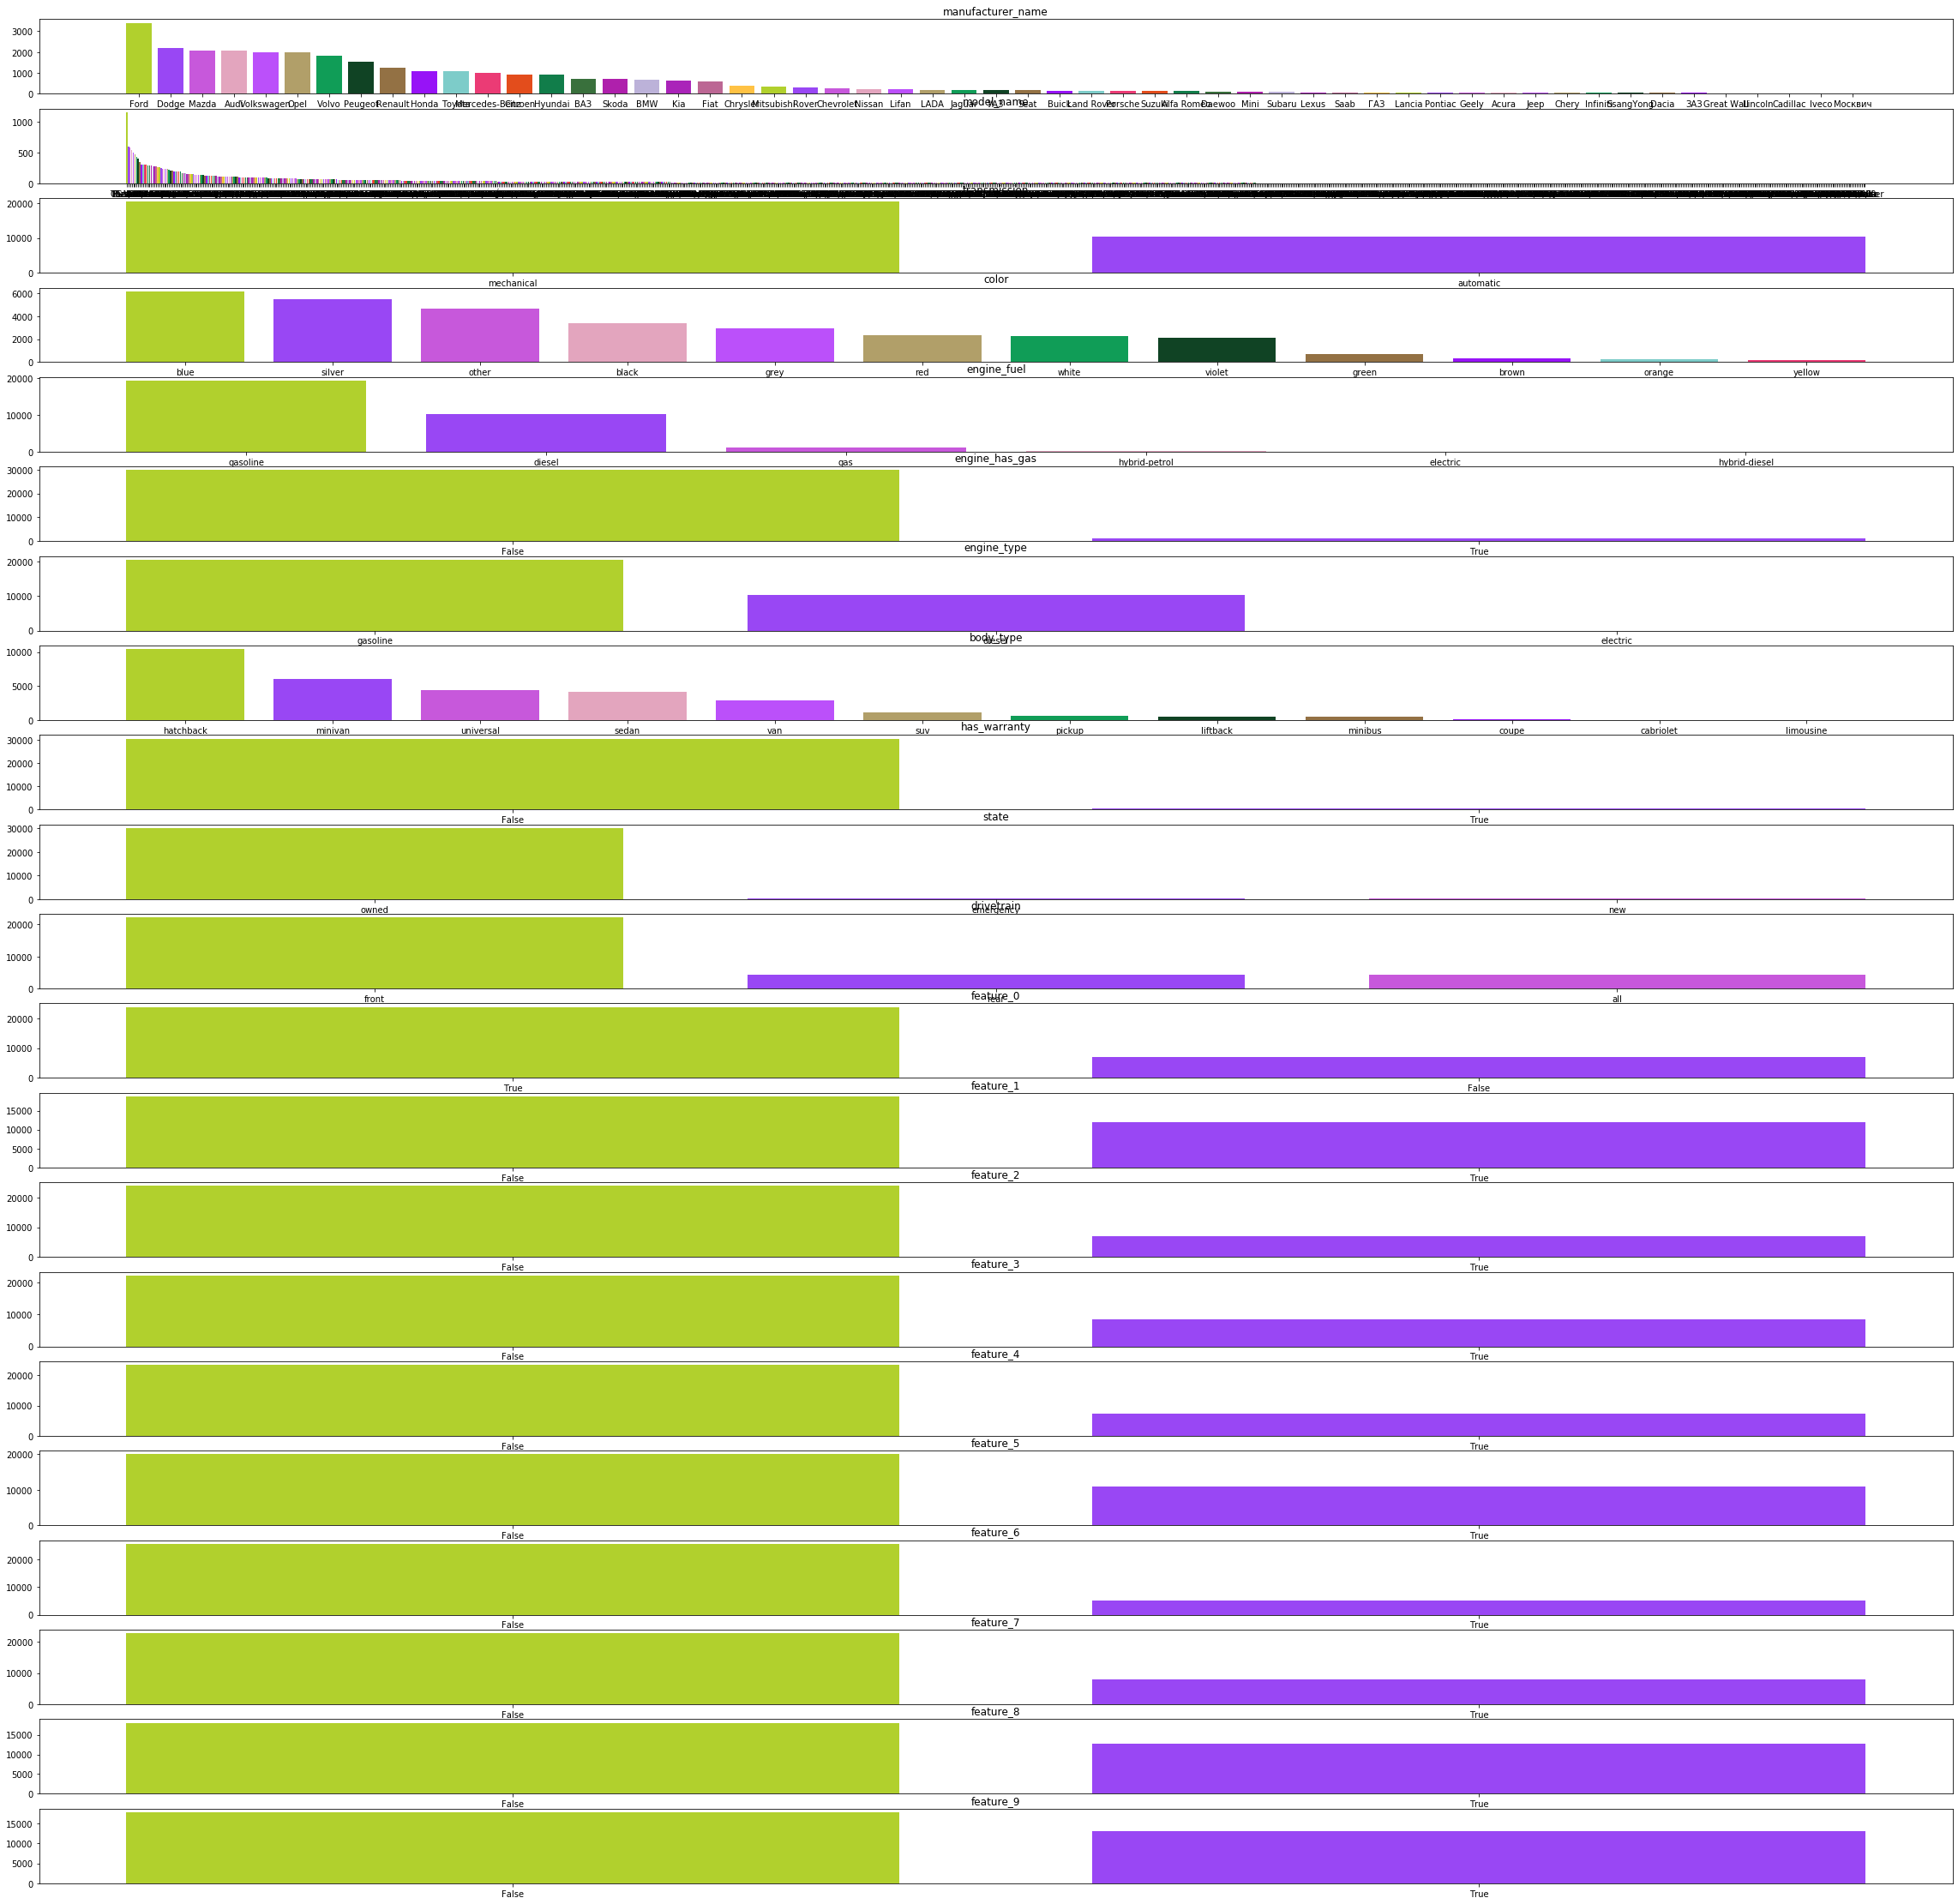

In [40]:
#plot frequency for categorical variables; determine cramers V matrix
n_cat = df_cat.shape[1]
fig, axs = plt.subplots(n_cat, 1 , figsize=(40,40))
bar_col = np.random.rand(20,3)
cramersV_matrix = pd.DataFrame(np.zeros((n_cat, n_cat)), columns = names_cat, index = names_cat)
for i in range(n_cat):
    col = names_cat[i]
    l = df[col].unique()
    n = df[col].nunique()
    x = np.arange(n)
    y = df[col].value_counts()
    axs[i].bar(x,y,color=bar_col[0:n,:])
    axs[i].set_title(col)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(l)
    cramersV_matrix[col] = cramers_v_row(df[col],df[names_cat])

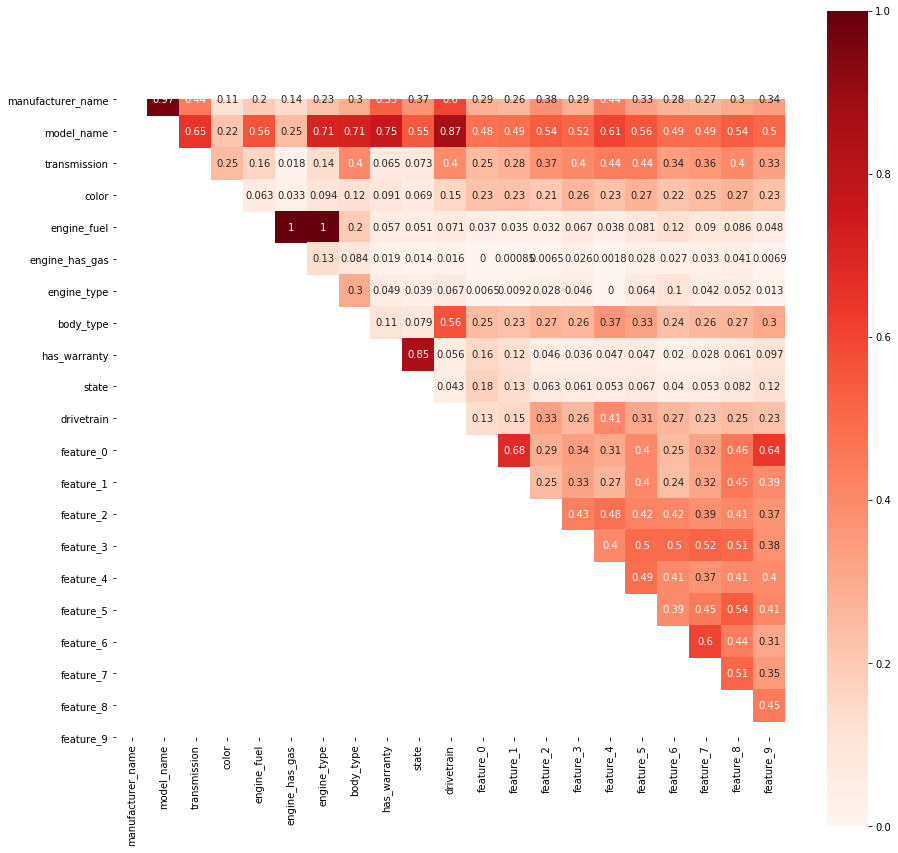

In [42]:
#plot cramers V matrix
mask = np.tril(np.ones_like(cramersV_matrix, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15))
ax=sns.heatmap(cramersV_matrix, mask=mask, cmap="Reds", vmax=1,square=True,annot=True)

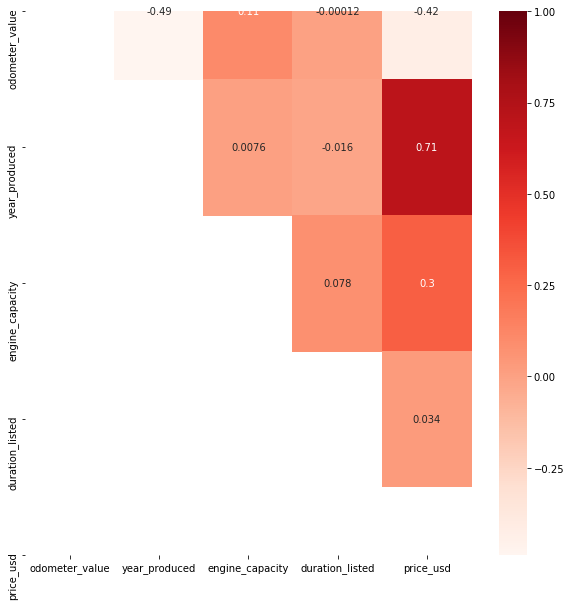

In [44]:
#plot correlation matrix for numeric variables
mask = np.tril(np.ones_like(df[names_num].corr(), dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.heatmap(df[names_num].corr(),cmap='Reds',mask=mask,annot=True)

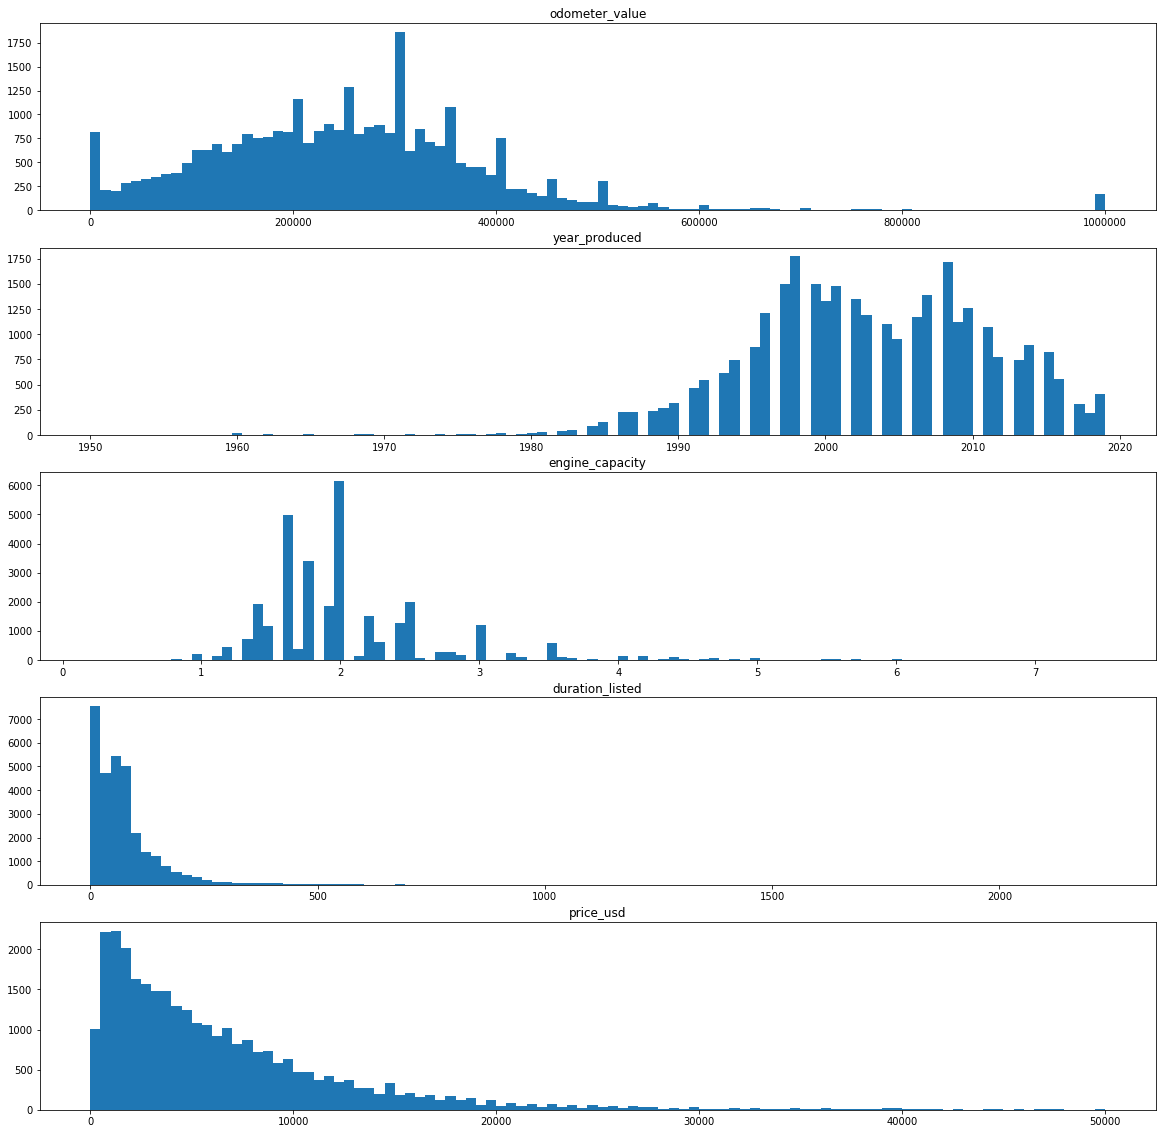

In [50]:
#plot boxplots and histograms for numeric variables
n_num = len(names_num)
fig, ax = plt.subplots(n_num,1,figsize=(20, 20))
for i in range(n_num):
    toplot = df[names_num[i]]
    ax[i].hist(toplot,100)
    ax[i].set_title(names_num[i])